In [ ]:
import tensorflow_datasets as tfds

# Load the cats_vs_dogs dataset
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

# Split the dataset into training and testing sets
train_dataset = dataset['train']

# Print information about the dataset
print(info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.HQ8GR9_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings 

In [ ]:
import tensorflow as tf

IMG_WIDTH = 128
IMG_HEIGHT = 128

def preprocess(image, label):
  image = tf.image.resize(image, (IMG_WIDTH, IMG_HEIGHT))
  image = tf.cast(image, tf.float32)
  image = image / 255.0
  return image, label

train_dataset = train_dataset.map(preprocess).batch(32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid') # Use sigmoid for binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
# Assuming you have a validation_dataset as well, you can uncomment the validation_data line
# validation_dataset = dataset['validation'].map(preprocess).batch(32)

history = model.fit(train_dataset, epochs=10) #, validation_data=validation_dataset)

Epoch 1/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 36s 40ms/step - accuracy: 0.6101 - loss: 0.6417
Epoch 2/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7616 - loss: 0.4932
Epoch 3/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8203 - loss: 0.3941
Epoch 4/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.8644 - loss: 0.3213
Epoch 5/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.8947 - loss: 0.2478
Epoch 6/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.9200 - loss: 0.1882
Epoch 7/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.9410 - loss: 0.1458
Epoch 8/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.9551 - loss: 0.1172
Epoch 9/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.9677 - loss: 0.0829
Epoch 10/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.9820 - loss: 0.0555


In [ ]:
# Evaluate the model
# Assuming you have a test_dataset as well, you can uncomment the lines below
# test_dataset = dataset['test'].map(preprocess).batch(32)
# loss, accuracy = model.evaluate(test_dataset)

# Since we only have a train dataset for now, we'll evaluate on a subset of the train data
loss, accuracy = model.evaluate(train_dataset)
print(f'Accuracy: {accuracy}')

727/727 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9634 - loss: 0.1068
Accuracy: 0.9643625020980835


In [ ]:
import numpy as np
from PIL import Image

# Define file paths for new images
image_paths = ['/tmp/new_cat_image.jpg', '/tmp/new_dog_image.jpg'] # Replace with actual file paths

# Create dummy image files for demonstration purposes
# Create a simple black image
dummy_image_array = np.zeros((IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.uint8)
dummy_image = Image.fromarray(dummy_image_array, 'RGB')

dummy_image.save('/tmp/new_cat_image.jpg')
dummy_image.save('/tmp/new_dog_image.jpg')

new_images = []
for img_path in image_paths:
  img = tf.keras.utils.load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
  img_array = tf.keras.utils.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
  img_array = img_array / 255.0 # Preprocess
  new_images.append(img_array)

# Concatenate the list of image arrays into a single array for prediction
new_images = np.vstack(new_images)

# Make predictions
predictions = model.predict(new_images)

# Store the predictions
# The predictions are probabilities. For binary classification with sigmoid,
# values close to 0 indicate one class (e.g., cat) and values close to 1
# indicate the other class (e.g., dog).
print("Predictions (probabilities):", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
Predictions (probabilities): [[0.00189982]
 [0.00189982]]


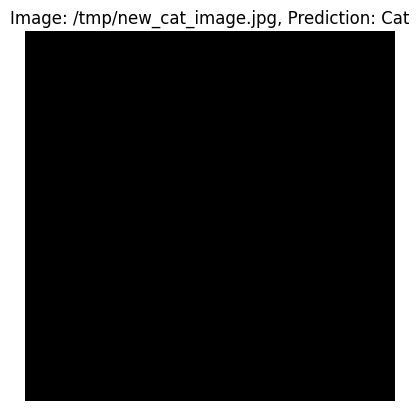

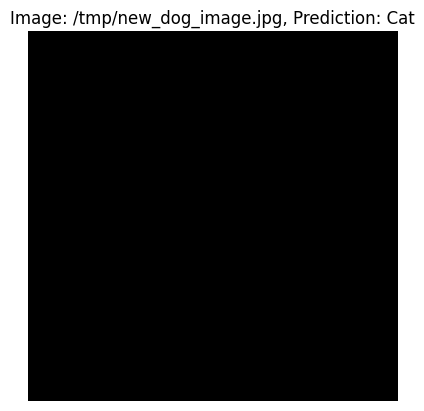

In [ ]:
import matplotlib.pyplot as plt

for i, img_path in enumerate(image_paths):
  # Load the image
  img = tf.keras.utils.load_img(img_path)

  # Determine the predicted class
  predicted_class = 'Dog' if predictions[i] >= 0.5 else 'Cat'

  # Create a figure and axes for displaying the image
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)

  # Display the image
  ax.imshow(img)

  # Set the title with image path and prediction
  ax.set_title(f"Image: {img_path}, Prediction: {predicted_class}")

  # Turn off axis labels
  ax.axis('off')

  # Display the plot
  plt.show()

In [ ]:
# Save the trained model
model_save_path = 'cats_vs_dogs_model.keras' # Use .keras format for Keras v3+
model.save(model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to cats_vs_dogs_model.keras


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create a FileUpload widget
uploader = widgets.FileUpload(
    accept='.jpg, .jpeg, .png',  # Accepted file extensions
    multiple=True  # Allow multiple file uploads
)

# Display the widget
display(uploader)

FileUpload(value={}, accept='.jpg, .jpeg, .png', description='Upload', multiple=True)

In [ ]:
import io

uploaded_images_processed = []
for filename, file_info in uploader.value.items():
    # Read the image file content
    img_content = file_info['content']
    img_bytes = io.BytesIO(img_content)

    # Decode the image
    img = tf.image.decode_image(img_bytes.read(), channels=3)

    # Resize the image
    img = tf.image.resize(img, (IMG_WIDTH, IMG_HEIGHT))

    # Normalize pixel values
    img = img / 255.0

    # Add batch dimension
    img = tf.expand_dims(img, axis=0)

    uploaded_images_processed.append(img)

# Concatenate all images into a single tensor
uploaded_images_processed = tf.concat(uploaded_images_processed, axis=0)

print("Uploaded images preprocessed and ready for prediction.")

Uploaded images preprocessed and ready for prediction.


In [ ]:
import io

uploaded_images_processed = []
for filename, file_info in uploader.value.items():
    # Read the image file content
    img_content = file_info['content']
    img_bytes = io.BytesIO(img_content)

    # Decode the image
    img = tf.image.decode_image(img_bytes.read(), channels=3)

    # Resize the image
    img = tf.image.resize(img, (IMG_WIDTH, IMG_HEIGHT))

    # Normalize pixel values
    img = img / 255.0

    # Add batch dimension
    img = tf.expand_dims(img, axis=0)

    uploaded_images_processed.append(img)

# Concatenate all images into a single tensor if the list is not empty
if uploaded_images_processed:
    uploaded_images_processed = tf.concat(uploaded_images_processed, axis=0)
    print("Uploaded images preprocessed and ready for prediction.")
else:
    print("No images uploaded.")
    uploaded_images_processed = None # Set to None or an empty tensor as appropriate for downstream tasks


Uploaded images preprocessed and ready for prediction.


In [ ]:
if uploaded_images_processed is None or tf.shape(uploaded_images_processed)[0] == 0:
    print("No images to predict on.")
else:
    predictions_uploaded = model.predict(uploaded_images_processed)
    print("Predictions on uploaded images:", predictions_uploaded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predictions on uploaded images: [[0.26011908]]


## نمایش نتایج پیش بینی

### Subtask:
نتایج پیش بینی را به همراه تصاویر اصلی نمایش دهید.


Displaying uploaded images with predictions:


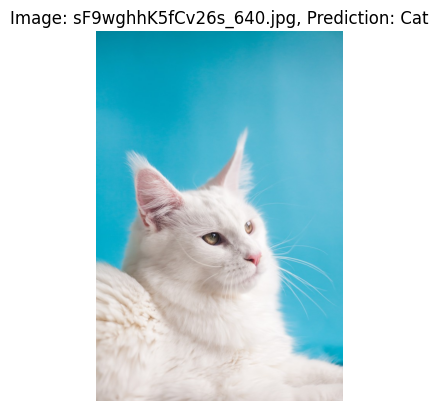

In [ ]:
import matplotlib.pyplot as plt
import io

if 'uploaded_images_processed' in locals() and uploaded_images_processed is not None and 'predictions_uploaded' in locals() and predictions_uploaded is not None:
    num_images = tf.shape(uploaded_images_processed)[0]

    if num_images > 0:
        print("Displaying uploaded images with predictions:")
        for i in range(num_images):
            # Load the original image from uploader.value
            # We need to get the filename to access the original content
            filename = list(uploader.value.keys())[i]
            img_content = uploader.value[filename]['content']
            img_bytes = io.BytesIO(img_content)
            img = tf.keras.utils.load_img(img_bytes)

            # Determine the predicted class
            predicted_class = 'Dog' if predictions_uploaded[i] >= 0.5 else 'Cat'

            # Create a figure and axes for displaying the image
            fig = plt.figure()
            ax = fig.add_subplot(1, 1, 1)

            # Display the image
            ax.imshow(img)

            # Set the title with image path and prediction
            ax.set_title(f"Image: {filename}, Prediction: {predicted_class}")

            # Turn off axis labels
            ax.axis('off')

            # Display the plot
            plt.show()
    else:
        print("No processed images available for display.")
else:
    print("No processed images or predictions available. Please upload images first.")

In [1]:
!jupyter nbconvert --to notebook --inplace --ClearMetadataPreprocessor.enabled=True YourNotebook.ipynb

[NbConvertApp] WARNING | pattern 'YourNotebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
  